In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances

In [2]:
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(precision=None, suppress=True)

In [4]:
pd.options.display.max_columns = 100
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.4585743168,5.6828613216,7.0091881428,4.0900000000,23086.8005026865,1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6424548257,6.0028998083,6.7308210191,3.0900000000,40173.0721736448,1505890.9148469500,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.0671786568,5.8658898403,8.5127274304,5.1300000000,36882.1593997046,1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2400462280,7.1882360945,5.5867286648,3.2600000000,34310.2428309071,1260616.8066294468,USS Barnett\nFPO AP 44820
4,59982.1972257080,5.0405545231,7.8393877851,4.2300000000,26354.1094721031,630943.4893385402,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.shape

(5000, 7)

In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000000000,5000.0000000000,5000.0000000000,5000.0000000000,5000.0000000000,5000.0000000000
mean,68583.1089839597,5.9772220353,6.9877918509,3.9813300000,36163.5160385746,1232072.6541423600
std,10657.9912138304,0.9914561798,1.0058332313,1.2341372655,9925.6501135012,353117.6265810608
min,17796.6311895434,2.6443041860,3.2361940234,2.0000000000,172.6106862729,15938.6579232878
25%,61480.5623884610,5.3222830158,6.2992500996,3.1400000000,29403.9287016085,997577.1350487601
50%,68804.2864037162,5.9704289471,7.0029019872,4.0500000000,36199.4066892606,1232669.3779657914
75%,75783.3386661526,6.6508084794,7.6658714476,4.4900000000,42861.2907689156,1471210.2042115545
max,107701.7483776393,9.5190880661,10.7595883359,6.5000000000,69621.7133777904,2469065.5941747027


In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

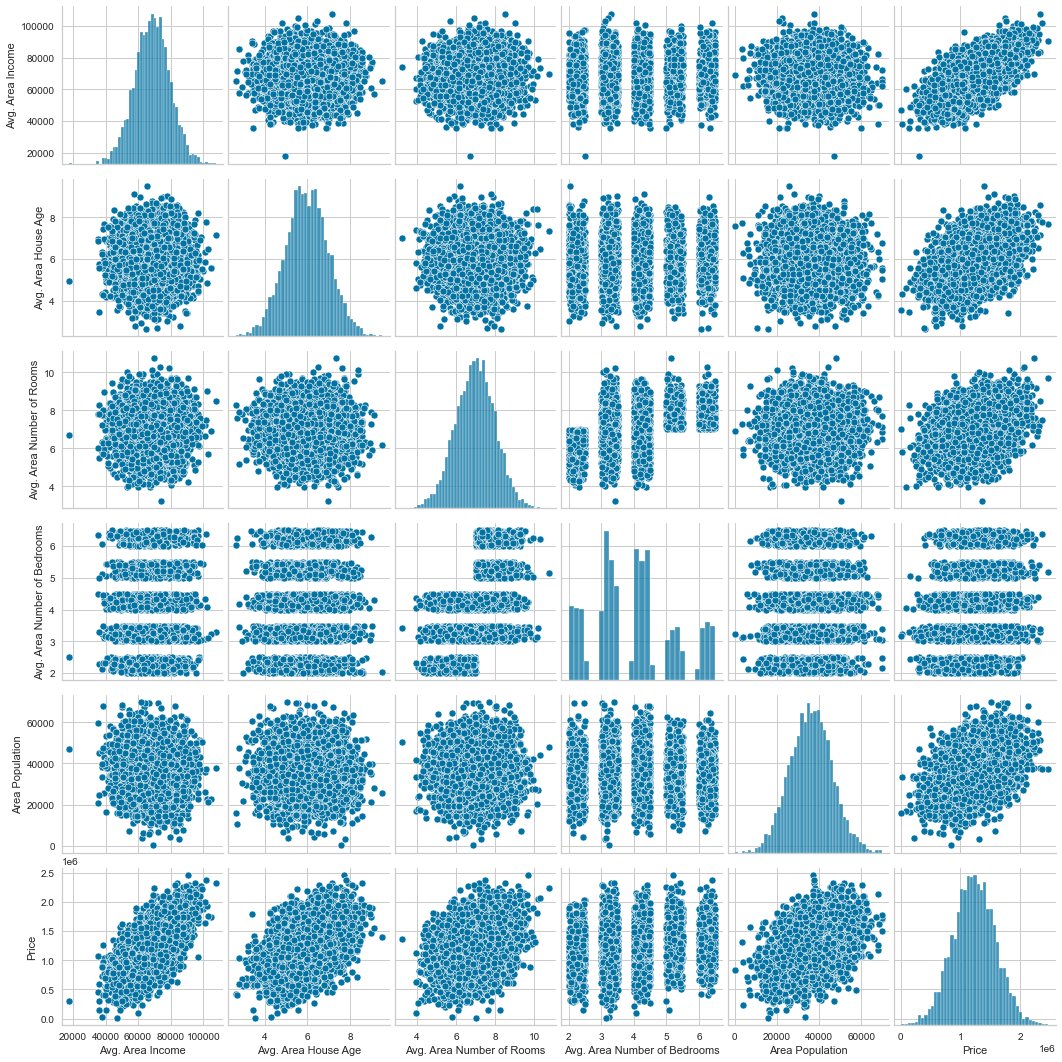

In [11]:
sns.pairplot(df)

<AxesSubplot:>

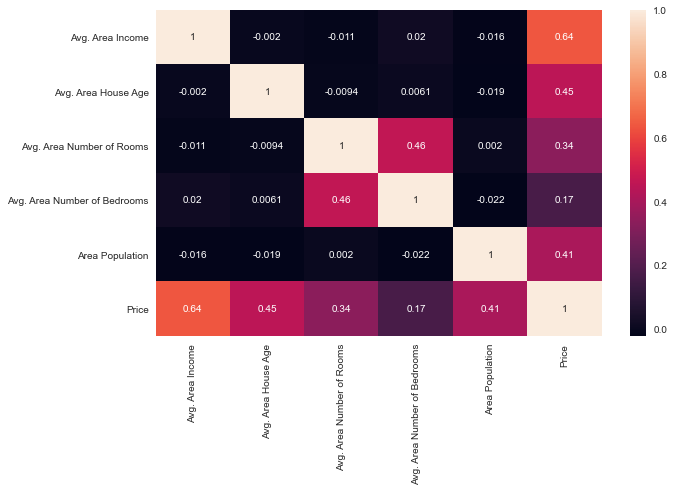

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

C:\Users\NIO\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

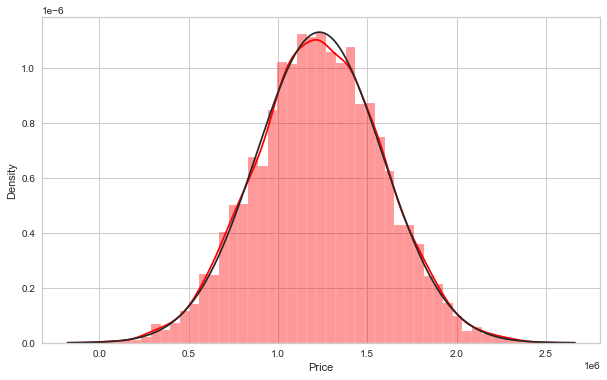

In [13]:
plt.figure(figsize=(10,6))

sns.distplot(df.Price, fit=norm, color='red')

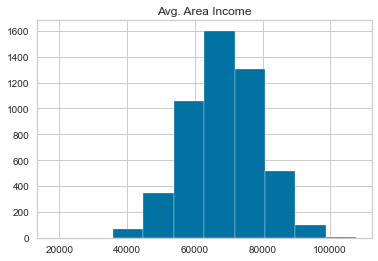

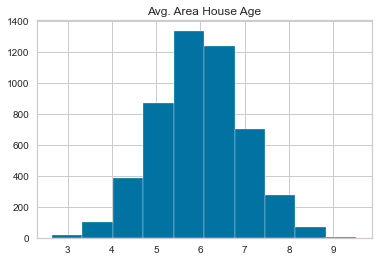

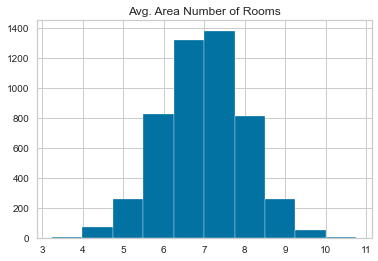

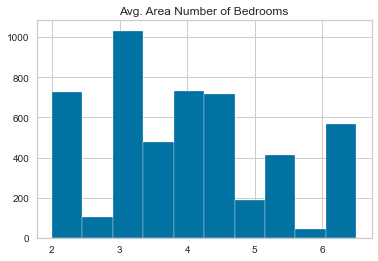

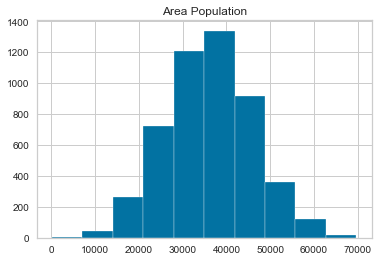

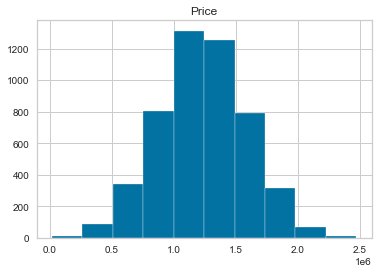

In [14]:
for column in df.select_dtypes(np.number).columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [15]:
skew(df.select_dtypes(np.number))

array([-0.03370986, -0.00721171, -0.04098361,  0.37612752,  0.05063449,
       -0.00271725])

In [16]:
pd.DataFrame(data={'Column name':df.select_dtypes(np.number).columns, 'Skewness':skew(df.select_dtypes(np.number))})

,Column name,Skewness
0,Avg. Area Income,-0.0337098586
1,Avg. Area House Age,-0.0072117080
2,Avg. Area Number of Rooms,-0.0409836104
3,Avg. Area Number of Bedrooms,0.3761275157
4,Area Population,0.0506344854
5,Price,-0.0027172494


# Linear Regression

In [17]:
X = df.drop(columns=['Price', 'Address'])

In [18]:
y = df.Price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scores = cross_val_score(LinearRegression(), X, y, cv=10, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


In [21]:
scores

array([0.91336093, 0.92112399, 0.91727189, 0.92360986, 0.91247623,
       0.91771186, 0.91672276, 0.92487908, 0.9212436 , 0.90539243])

In [22]:
scores.mean()

0.9173792621537281

In [23]:
scaler = StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
X_train.shape

(4000, 5)

In [27]:
X_test.shape

(1000, 5)

In [28]:
lm_cross_val = pd.DataFrame(cross_validate(LinearRegression(), X_train, y_train, cv=10, n_jobs=-1, verbose=2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [29]:
lm_cross_val

,fit_time,score_time,test_score
0,0.0049993992,0.0009996891,0.9091718144
1,0.0208752155,0.0000000000,0.9172700312
2,0.0020017624,0.0010015965,0.9128191836
3,0.0020020008,0.0010008812,0.9069790914
4,0.0020024776,0.0000000000,0.9175083085
5,0.0019996166,0.0009994507,0.9215022592
6,0.0019981861,0.0010004044,0.9202996552
7,0.0019998550,0.0000000000,0.9202584940
8,0.0030007362,0.0000000000,0.9194205519
9,0.0020010471,0.0009999275,0.9276129835


In [30]:
lm_cross_val.test_score.mean()

0.9172842372889519

In [31]:
lm = LinearRegression()

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lm.predict(X_test)

In [34]:
len(y_pred)

1000

In [35]:
lm.score(X_train, y_train)

0.9179787435623722

In [36]:
lm.score(X_test, y_test)

0.9179971706834331

In [37]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [38]:
coeff_df

,Coefficient
Avg. Area Income,231741.8766521736
Avg. Area House Age,163580.7765661357
Avg. Area Number of Rooms,120724.7713874459
Avg. Area Number of Bedrooms,2992.4491354057
Area Population,152235.9000969893


In [39]:
lm.intercept_

1229576.99256009

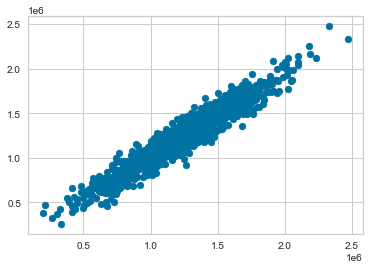

In [40]:
plt.scatter(y_test, y_pred)

C:\Users\NIO\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


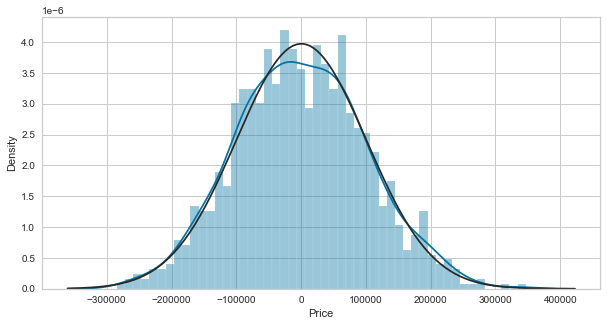

In [41]:
plt.figure(figsize=(10, 5))
sns.distplot((y_test - y_pred), bins=50, fit=norm);

In [42]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [43]:
print_evaluate(y_test, y_pred)

MAE: 80879.09723489442
MSE: 10089009300.893988
RMSE: 100444.0605555848
R2 Square 0.9179971706834331
__________________________________


In [44]:
final_scores = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'R2_Score'], data=[80879.09723489442, 0089009300.893988, 100444.0605555848, 0.9179971706834331], columns=['LinearModel'])

In [45]:
final_scores

,LinearModel
MAE,80879.0972348944
MSE,89009300.8939879984
RMSE,100444.0605555848
R2_Score,0.9179971707


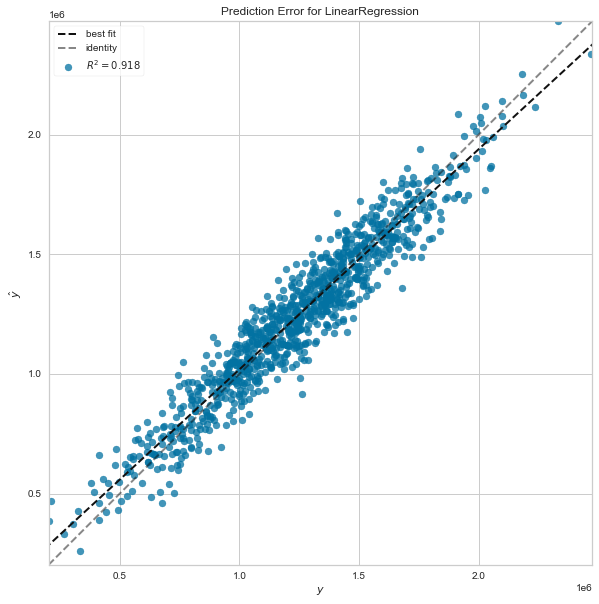

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
plt.figure(figsize=(10, 10))
visualizer = PredictionError(LinearRegression())

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.show()

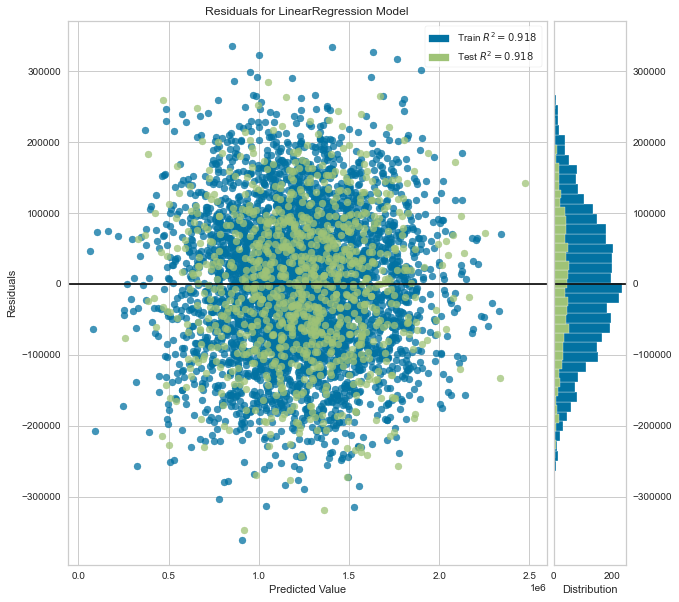

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
plt.figure(figsize=(10, 10))
model = ResidualsPlot(LinearRegression())

model.fit(X_train, y_train)

model.score(X_test, y_test)

model.show()

# Ridge Regression

In [48]:
rm = Ridge(alpha=100, random_state=42)

In [49]:
rm.fit(X_train, y_train)

Ridge(alpha=100, random_state=42)

In [50]:
rm_pred = rm.predict(X_test)

In [51]:
rm.score(X_train, y_train)

0.9173801693353605

In [52]:
rm.score(X_test, y_test)

0.9174033945344908

In [53]:
alpha_space = np.linspace(0.01, 40, 300)

In [54]:
alpha_dict = {'alpha': alpha_space}

In [55]:
clf = GridSearchCV(Ridge(random_state=42), alpha_dict, n_jobs=-1, verbose=2)

In [56]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.3s finished


GridSearchCV(estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.14374582,  0.27749164,  0.41123746,  0.54498328,
        0.6787291 ,  0.81247492,  0.94622074,  1.07996656,  1.21371237,
        1.34745819,  1.48120401,  1.61494983,  1.74869565,  1.88244147,
        2.01618729,  2.14993311,  2.28367893,  2.41742475,  2.55117057,
        2.68491639,  2.81866221,  2.95240803,  3.08615385,  3.21989967...
       36.12137124, 36.25511706, 36.38886288, 36.5226087 , 36.65635452,
       36.79010033, 36.92384615, 37.05759197, 37.19133779, 37.32508361,
       37.45882943, 37.59257525, 37.72632107, 37.86006689, 37.99381271,
       38.12755853, 38.26130435, 38.39505017, 38.52879599, 38.66254181,
       38.79628763, 38.93003344, 39.06377926, 39.19752508, 39.3312709 ,
       39.46501672, 39.59876254, 39.73250836, 39.86625418, 40.        ])},
             verbose=2)

In [57]:
clf.best_params_

{'alpha': 0.6787290969899666}

In [58]:
clf.best_score_

0.9174132336251193

In [59]:
rm = Ridge(alpha=0.67872, random_state=42)

In [60]:
rm.fit(X_train, y_train)

Ridge(alpha=0.67872, random_state=42)

In [61]:
rm.score(X_train, y_train)

0.9179787144264284

In [62]:
rm.score(X_test, y_test)

0.9179972183429598

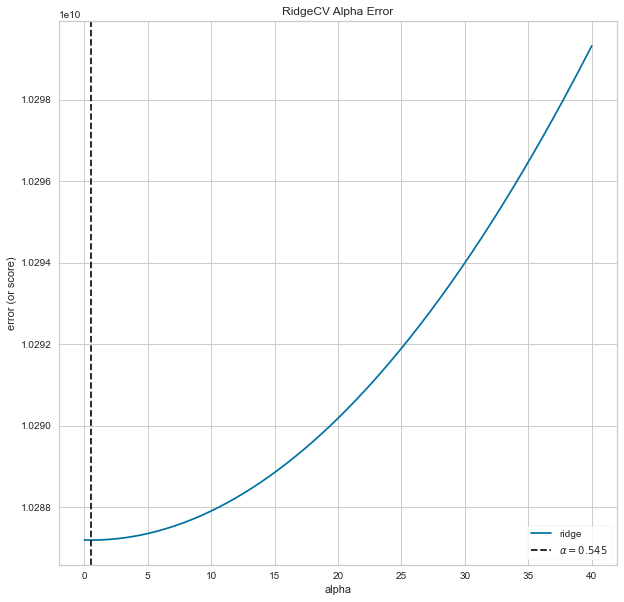

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [63]:
plt.figure(figsize=(10, 10))
visualizer = AlphaSelection(
    RidgeCV(alphas=alpha_space)
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [64]:
rm = Ridge(alpha=0.545, random_state=42)

In [65]:
rm.fit(X_train, y_train)

Ridge(alpha=0.545, random_state=42)

In [66]:
rm.score(X_train, y_train)

0.9179787247746746

In [67]:
rm.score(X_test, y_test)

0.9179972136136312

In [68]:
rm_pred = rm.predict(X_test)

In [69]:
print_evaluate(y_test, rm_pred)

MAE: 80878.37005132735
MSE: 10089004019.086395
RMSE: 100444.03426329707
R2 Square 0.9179972136136312
__________________________________


In [70]:
final_scores = final_scores.join(pd.Series([80878.37005132732, 10089004019.086391, 100444.03426329704, 0.9179972136136312], name='RidgeModel', index=['MAE', 'MSE', 'RMSE', 'R2_Score']))

In [71]:
final_scores

,LinearModel,RidgeModel
MAE,80879.0972348944,80878.3700513273
MSE,89009300.8939879984,10089004019.0863914490
RMSE,100444.0605555848,100444.0342632970
R2_Score,0.9179971707,0.9179972136


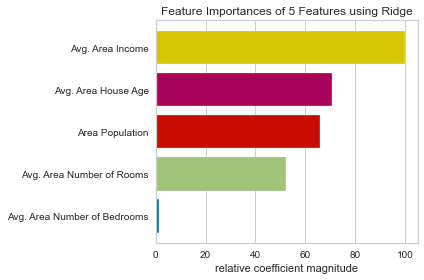

<AxesSubplot:title={'center':'Feature Importances of 5 Features using Ridge'}, xlabel='relative coefficient magnitude'>

In [72]:
viz = FeatureImportances(Ridge(alpha=0.545, random_state=42), labels=X.columns)
viz.fit(X_train, y_train)
viz.show()

In [73]:
rm.coef_

array([231709.34014602, 163557.6900214 , 120702.82458228,   3002.70817202,
       152214.15872138])

# Lasso Regression

In [74]:
lr = Lasso(random_state=42)

In [75]:
lr.alpha

1.0

In [76]:
lr.fit(X_train, y_train)

Lasso(random_state=42)

In [77]:
lr.score(X_train, y_train)

0.9179787435312492

In [78]:
lr.score(X_test, y_test)

0.9179972521079874

In [79]:
clf = GridSearchCV(Lasso(random_state=42), param_grid=alpha_dict, n_jobs=-1)

In [80]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.14374582,  0.27749164,  0.41123746,  0.54498328,
        0.6787291 ,  0.81247492,  0.94622074,  1.07996656,  1.21371237,
        1.34745819,  1.48120401,  1.61494983,  1.74869565,  1.88244147,
        2.01618729,  2.14993311,  2.28367893,  2.41742475,  2.55117057,
        2.68491639,  2.81866221,  2.95240803,  3.08615385,  3.21989967...
       36.12137124, 36.25511706, 36.38886288, 36.5226087 , 36.65635452,
       36.79010033, 36.92384615, 37.05759197, 37.19133779, 37.32508361,
       37.45882943, 37.59257525, 37.72632107, 37.86006689, 37.99381271,
       38.12755853, 38.26130435, 38.39505017, 38.52879599, 38.66254181,
       38.79628763, 38.93003344, 39.06377926, 39.19752508, 39.3312709 ,
       39.46501672, 39.59876254, 39.73250836, 39.86625418, 40.        ])})

In [81]:
clf.best_params_

{'alpha': 1.3474581939799333}

In [82]:
clf.best_score_

0.9174131973497808

In [83]:
lr = Lasso(alpha=1.3474581939799333, random_state=42)

In [84]:
lr.fit(X_train, y_train)

Lasso(alpha=1.3474581939799333, random_state=42)

In [85]:
lr_pred = lr.predict(X_test)

In [86]:
lr.score(X_train, y_train)

0.9179787434812468

In [87]:
lr.score(X_test, y_test)

0.9179974292157917

In [88]:
print_evaluate(y_test, lr_pred)

MAE: 80878.99115780405
MSE: 10088977493.023546
RMSE: 100443.9022192166
R2 Square 0.9179974292157917
__________________________________


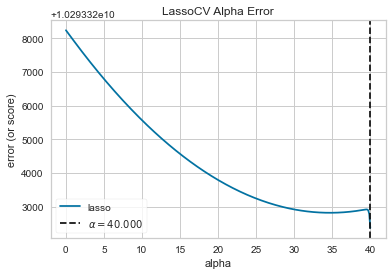

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [89]:
visualizer = AlphaSelection(
    LassoCV(alphas=alpha_space, random_state=42)
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [90]:
lr = Lasso(alpha=40, random_state=42)

In [91]:
lr.fit(X_train, y_train)

Lasso(alpha=40, random_state=42)

In [92]:
lr_pred = lr.predict(X_test)

In [93]:
print_evaluate(y_test, lr_pred)

MAE: 80877.71295992234
MSE: 10088815900.887579
RMSE: 100443.09782602078
R2 Square 0.9179987426264498
__________________________________


In [94]:
final_scores = final_scores.join(pd.Series([80877.71295992234, 10088815900.887579, 100443.09782602078, 0.9179987426264498], name='LassoModel', index=['MAE', 'MSE', 'RMSE', 'R2_Score']))

In [95]:
final_scores

,LinearModel,RidgeModel,LassoModel
MAE,80879.0972348944,80878.3700513273,80877.7129599223
MSE,89009300.8939879984,10089004019.0863914490,10088815900.8875789642
RMSE,100444.0605555848,100444.0342632970,100443.0978260208
R2_Score,0.9179971707,0.9179972136,0.9179987426


# Polynomial Regression

In [96]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
poly_reg = PolynomialFeatures(degree=2, include_bias=False)

In [98]:
X_train_poly = poly_reg.fit_transform(X_train_poly)

In [99]:
X_test_poly = poly_reg.transform(X_test_poly)

In [100]:
X_train_poly.shape

(4000, 20)

In [101]:
scaler_2 = StandardScaler()

In [102]:
X_train_poly_scaled = scaler_2.fit_transform(X_train_poly)

In [103]:
X_test_poly_scaled = scaler_2.transform(X_test_poly)

In [104]:
lin_reg = LinearRegression()

In [105]:
lin_reg.fit(X_train_poly_scaled, y_train_poly)

LinearRegression()

In [106]:
lin_reg.score(X_train_poly_scaled, y_train_poly)

0.9181470377725716

In [107]:
lin_reg.score(X_test_poly_scaled, y_test_poly)

0.9179137874167399

In [108]:
ridge = Ridge(random_state=42)

In [109]:
ridge.fit(X_train_poly_scaled, y_train_poly)

Ridge(random_state=42)

In [110]:
ridge.score(X_train_poly_scaled, y_train_poly)

0.9181344339312336

In [111]:
ridge.score(X_test_poly_scaled, y_test_poly)

0.9178632978176939

In [112]:
clf = GridSearchCV(Ridge(random_state=42), param_grid=alpha_dict, n_jobs=-1)

In [113]:
clf.fit(X_train_poly_scaled, y_train_poly)

GridSearchCV(estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.14374582,  0.27749164,  0.41123746,  0.54498328,
        0.6787291 ,  0.81247492,  0.94622074,  1.07996656,  1.21371237,
        1.34745819,  1.48120401,  1.61494983,  1.74869565,  1.88244147,
        2.01618729,  2.14993311,  2.28367893,  2.41742475,  2.55117057,
        2.68491639,  2.81866221,  2.95240803,  3.08615385,  3.21989967...
       36.12137124, 36.25511706, 36.38886288, 36.5226087 , 36.65635452,
       36.79010033, 36.92384615, 37.05759197, 37.19133779, 37.32508361,
       37.45882943, 37.59257525, 37.72632107, 37.86006689, 37.99381271,
       38.12755853, 38.26130435, 38.39505017, 38.52879599, 38.66254181,
       38.79628763, 38.93003344, 39.06377926, 39.19752508, 39.3312709 ,
       39.46501672, 39.59876254, 39.73250836, 39.86625418, 40.        ])})

In [114]:
clf.best_params_

{'alpha': 1.0799665551839466}

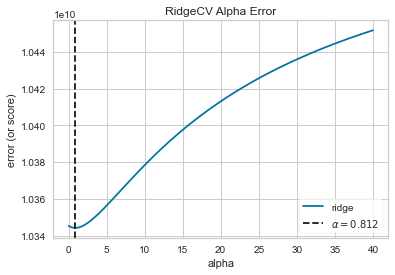

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [115]:
visualizer = AlphaSelection(
    RidgeCV(alphas=alpha_space)
)
visualizer.fit(X_train_poly_scaled, y_train_poly)
visualizer.show()

In [116]:
ridge = Ridge(alpha=0.812, random_state=42)

In [117]:
ridge.fit(X_train_poly_scaled, y_train_poly)

Ridge(alpha=0.812, random_state=42)

In [118]:
ridge.score(X_train_poly_scaled, y_train_poly)

0.9181384499900059

In [119]:
ridge.score(X_test_poly_scaled, y_test_poly)

0.9178741746855186

In [120]:
rm_poly_pred = ridge.predict(X_test_poly_scaled)

In [121]:
print_evaluate(y_test_poly, rm_poly_pred)

MAE: 80888.86316040845
MSE: 10104141800.312305
RMSE: 100519.36032582134
R2 Square 0.9178741746855186
__________________________________


In [122]:
final_scores = final_scores.join(pd.Series([80888.86316040847, 10104141800.312243, 100519.36032582104, 0.917874174685519], name='PolyRidgeModel', index=['MAE', 'MSE', 'RMSE', 'R2_Score']))

In [123]:
final_scores

,LinearModel,RidgeModel,LassoModel,PolyRidgeModel
MAE,80879.0972348944,80878.3700513273,80877.7129599223,80888.8631604085
MSE,89009300.8939879984,10089004019.0863914490,10088815900.8875789642,10104141800.3122425079
RMSE,100444.0605555848,100444.0342632970,100443.0978260208,100519.3603258210
R2_Score,0.9179971707,0.9179972136,0.9179987426,0.9178741747


# PolyLasso Model

In [124]:
lasso = Lasso(random_state=42, max_iter=1000000)

In [125]:
lasso.fit(X_train_poly_scaled, y_train_poly)

Lasso(max_iter=1000000, random_state=42)

In [126]:
lasso.score(X_train_poly_scaled, y_train_poly)

0.9181470164358504

In [127]:
lasso.score(X_test_poly_scaled, y_test_poly)

0.917913779793659

In [128]:
clf = GridSearchCV(Lasso(random_state=42), alpha_dict, n_jobs=-1, verbose=2)

In [129]:
clf.fit(X_train_poly_scaled, y_train_poly)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   11.2s finished


GridSearchCV(estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.14374582,  0.27749164,  0.41123746,  0.54498328,
        0.6787291 ,  0.81247492,  0.94622074,  1.07996656,  1.21371237,
        1.34745819,  1.48120401,  1.61494983,  1.74869565,  1.88244147,
        2.01618729,  2.14993311,  2.28367893,  2.41742475,  2.55117057,
        2.68491639,  2.81866221,  2.95240803,  3.08615385,  3.21989967...
       36.12137124, 36.25511706, 36.38886288, 36.5226087 , 36.65635452,
       36.79010033, 36.92384615, 37.05759197, 37.19133779, 37.32508361,
       37.45882943, 37.59257525, 37.72632107, 37.86006689, 37.99381271,
       38.12755853, 38.26130435, 38.39505017, 38.52879599, 38.66254181,
       38.79628763, 38.93003344, 39.06377926, 39.19752508, 39.3312709 ,
       39.46501672, 39.59876254, 39.73250836, 39.86625418, 40.        ])},
             verbose=2)

In [130]:
clf.best_params_

{'alpha': 40.0}

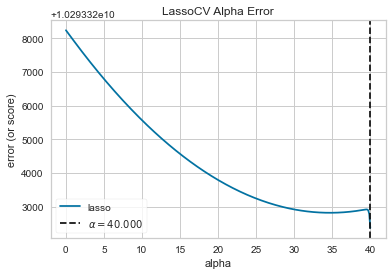

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [131]:
visualizer = AlphaSelection(
    LassoCV(alphas=alpha_space, random_state=42)
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [132]:
lasso = Lasso(max_iter=10000000, alpha=40, random_state=42)

In [133]:
lasso.fit(X_train_poly_scaled, y_train_poly)

Lasso(alpha=40, max_iter=10000000, random_state=42)

In [134]:
lasso.score(X_train_poly_scaled, y_train_poly)

0.9181205435334685

In [135]:
lasso.score(X_test_poly_scaled, y_test_poly)

0.9178212263017468

In [136]:
lasso.coef_

array([195163.8158515 , 152314.92513397, 106128.57658922,   1215.87408762,
       156347.88747909,  23866.03797143,   9946.77407861,     -0.        ,
         8454.7174535 ,   4666.66145211,   9652.36835239,    107.05650534,
        -5821.1976573 ,  -5715.89997923,  14642.80773143,   -174.51139463,
           -0.        ,     -0.        ,   -606.19360298,  -3091.4711256 ])

In [137]:
lasso_pred = lasso.predict(X_test_poly_scaled)

In [138]:
print_evaluate(y_test_poly, lasso_pred)

MAE: 80913.26671704589
MSE: 10110656169.887028
RMSE: 100551.75866133336
R2 Square 0.9178212263017468
__________________________________


In [139]:
final_scores = final_scores.join(pd.Series([80886.63136926523, 10099269086.678867, 100495.11971572982, 0.917913779793659], name='PolyLassoModel', index=['MAE', 'MSE', 'RMSE', 'R2_Score']))

In [140]:
final_scores

,LinearModel,RidgeModel,LassoModel,PolyRidgeModel,PolyLassoModel
MAE,80879.0972348944,80878.3700513273,80877.7129599223,80888.8631604085,80886.6313692652
MSE,89009300.8939879984,10089004019.0863914490,10088815900.8875789642,10104141800.3122425079,10099269086.6788673401
RMSE,100444.0605555848,100444.0342632970,100443.0978260208,100519.3603258210,100495.1197157298
R2_Score,0.9179971707,0.9179972136,0.9179987426,0.9178741747,0.9179137798


In [141]:
final_scores.loc['R2_Score', :].max()

0.9179987426264498